## Filtrado por sujeto con eventos 
Se busca que los datos de No_events sean acordes a los sujetos que sí tienen eventos, de esta manera también se valida que no haya desbalanceo de datos 

In [72]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\lauri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
# import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl
import shutil
import random

In [2]:
directorio_actual=os.getcwd()
archivos_1=os.listdir(directorio_actual+"/dataset/Non_Events/non_event_batch_1/")
archivos_2=os.listdir(directorio_actual+"/dataset/Non_Events/non_event_batch_2/")

eventos_oa = os.listdir(directorio_actual+"/Datos_Modelo/Events/oa")
eventos_ca = os.listdir(directorio_actual+"/Datos_Modelo/Events/ca")

print(archivos_1)
print(archivos_2)

print(len(archivos_1))
print(len(archivos_2))

print(eventos_oa)
print(eventos_ca)
print(len(eventos_oa))
print(len(eventos_ca))

eventos=eventos_ca+eventos_oa
print(f'Eventos ',eventos)
print(len(eventos))

['S1_p10_Stagen1_Event101_Session1.csv', 'S1_p10_Stagen1_Event103_Session1.csv', 'S1_p10_Stagen1_Event188_Session1.csv', 'S1_p10_Stagen1_Event189_Session1.csv', 'S1_p10_Stagen1_Event190_Session1.csv', 'S1_p10_Stagen1_Event215_Session1.csv', 'S1_p10_Stagen1_Event222_Session1.csv', 'S1_p10_Stagen1_Event225_Session1.csv', 'S1_p10_Stagen1_Event226_Session1.csv', 'S1_p10_Stagen1_Event228_Session1.csv', 'S1_p10_Stagen1_Event229_Session1.csv', 'S1_p10_Stagen1_Event230_Session1.csv', 'S1_p10_Stagen1_Event232_Session1.csv', 'S1_p10_Stagen1_Event233_Session1.csv', 'S1_p10_Stagen1_Event234_Session1.csv', 'S1_p10_Stagen1_Event238_Session1.csv', 'S1_p10_Stagen1_Event239_Session1.csv', 'S1_p10_Stagen1_Event242_Session1.csv', 'S1_p10_Stagen1_Event83_Session1.csv', 'S1_p10_Stagen1_Event88_Session1.csv', 'S1_p10_Stagen1_Event89_Session1.csv', 'S1_p10_Stagen1_Event90_Session1.csv', 'S1_p10_Stagen1_Event91_Session1.csv', 'S1_p10_Stagen1_Event93_Session1.csv', 'S1_p10_Stagen1_Event99_Session1.csv', 'S1_p1

# Prueba de cortar solo algunos canales 

In [76]:
# !pip install mne

# import mne

In [3]:
csv_path = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Events\ca\S1_p1_1_Stagen1_Event1_Session1.csv'
path_sano = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Non_Events\non_event_batch_1\S1_p1_Stagen1_Event10_Session1.csv'

df = pd.read_csv(csv_path)
print(df.head())


     LOC-A2    ROC-A1     F3-A2     C3-A2     O1-A2     F4-A1     C4-A1  \
0 -2.026017 -0.693904 -2.372396 -0.654231  0.368124 -0.815976  0.507744   
1 -1.120394 -1.163882 -0.812924  0.519188  1.343175 -0.328450  0.838102   
2  0.263600 -1.005188  0.758755  1.608682  0.744259 -1.065461 -0.738155   
3  0.178912  1.865797  0.731289 -0.045396 -0.038529  1.853590  1.698711   
4 -0.693141  1.492714 -0.995270 -1.667430 -0.777066  0.642786  0.201038   

      O2-A1        X1        X2        X3        X4        X5        X6  \
0  1.369116  1.780041  2.913939 -0.248157 -0.067979 -3.894163  0.492439   
1  1.589609  0.195727  0.827054 -0.072007 -0.083085  0.252140  0.579355   
2 -0.476463 -0.275868 -1.716503  0.005356  0.021653  0.812451  0.666758   
3  0.252918 -0.420737 -0.096910  0.152941  0.087114 -0.476265  0.697520   
4  1.625467 -0.685817  0.009293 -0.001785  0.153582 -0.775097  0.697520   

         DC3        X7         X8       SaO2         DC8  
0  13.153735  7.629236 -10.770718  96.4

In [87]:
df_sano = pd.read_csv(path_sano)
print(df_sano.head())

     LOC-A2    ROC-A1     F3-A2     C3-A2     O1-A2     F4-A1     C4-A1  \
0  0.571832  0.252918  0.696956  0.389487 -0.173571  0.617609  0.671015   
1  1.162356  0.243000  1.526284  0.163653 -0.841154 -0.105669 -0.812924   
2 -0.012589  0.053788  1.051728 -0.506218 -1.572824  0.236896  0.101854   
3  0.658045 -0.833524  1.995499  1.604868  0.529107 -0.574884 -0.767147   
4 -0.232319  0.361257 -0.830472 -0.931182  0.561913 -0.196460 -0.381857   

      O2-A1        X1        X2        X3        X4        X5        X6  \
0 -0.887694  2.097520 -0.638544  0.105333 -0.011582  2.997665 -2.594034   
1 -1.528573 -2.451987 -1.838636  0.066056 -0.038773  0.177432 -1.794217   
2 -0.725948  1.302281 -1.095216  0.151751  0.086107  0.121401 -1.040299   
3 -1.515602  0.571771  0.136736  0.048203  0.170703 -0.345525 -0.307378   
4  0.507744  1.259129 -6.397391  0.118425 -0.075029 -0.849805  0.338628   

         DC3        X7         X8      SaO2         DC8  
0  74.417121 -5.622797 -90.841520  98.46

15.0


Text(0, 0.5, 'Amplitude')

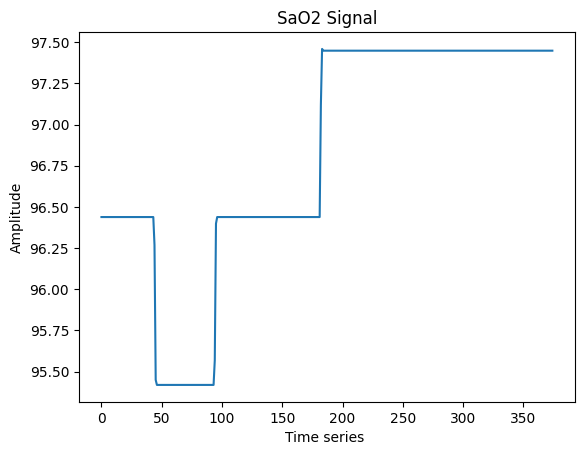

In [88]:
canal='SaO2'
# len(df[canal])
print(len(df[canal])*(1/25))

df[canal].plot( )
plt.title(f'{canal} Signal')
plt.xlabel('Time series ')
plt.ylabel('Amplitude')

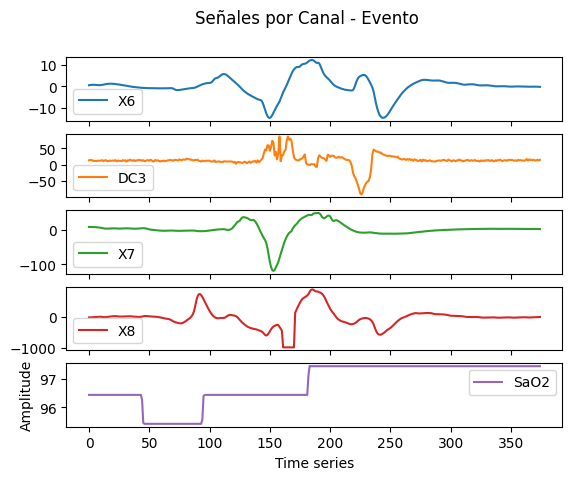

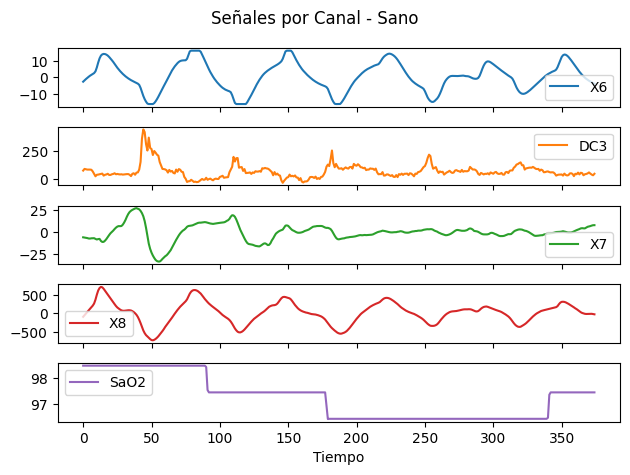

In [ ]:
canales=['X6','DC3','X7','X8','SaO2']
df_canales = df[canales]
df_canales.plot(subplots=True)
plt.suptitle('Señales por Canal - Evento')
plt.xlabel('Time series')   
plt.ylabel('Amplitude')

# Figura para sanos
df_sano[canales].plot(subplots=True)
plt.suptitle('Señales por Canal - Sano')
plt.xlabel('Tiempo')
plt.tight_layout()
plt.show()


In [81]:
print(df_canales)

           X6        DC3        X7         X8       SaO2
0    0.492439  13.153735  7.629236 -10.770718  96.438544
1    0.579355  14.218814  7.438560 -10.591455  96.438544
2    0.666758  14.218814  7.390890  -8.470176  96.438544
3    0.697520  12.067353  7.343221  -5.333074  96.438544
4    0.697520  12.067353  7.247883  -1.688060  96.438544
..        ...        ...       ...        ...        ...
370 -0.184329  12.621195  1.718257  -4.167864  97.448692
371 -0.184329  13.153735  1.765927  -0.731991  97.448692
372 -0.204837  15.028275  1.718257   1.568551  97.448692
373 -0.235599  12.876814  1.622919   2.195972  97.448692
374 -0.286870  14.495735  1.432242   3.450813  97.448692

[375 rows x 5 columns]


In [ ]:
canales=['X6','DC3','X7','X8','SaO2']

csv_path = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Events\ca'
path_sano = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Non_Events\non_event_batch_1'


path_destino_eventos=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca'
path_destino_noeventos=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events'

# Recorremos cada archivo en la carpeta - Eventos
for nombre_archivo in os.listdir(csv_path):
    print(f"Procesando archivo: {nombre_archivo}")
    if nombre_archivo.endswith('.csv'):
        ruta_original = os.path.join(csv_path, nombre_archivo)

        # Cargar el archivo CSV
        try:
            df = pd.read_csv(ruta_original)
            # print(df.head())

            df.columns = df.columns.str.strip()  # Eliminar espacios

            # Filtrar solo los canales deseados (verifica que existan en el DataFrame)
            canales_existentes = [c for c in canales if c in df.columns]
            
            print(f"Canales existentes en {nombre_archivo}: {canales_existentes}")

            df_filtrado = df[canales_existentes]
            # print(df_filtrado.head())

            # Construir nuevo nombre
            nombre_base, extension = os.path.splitext(nombre_archivo)
            nuevo_nombre = f"{nombre_base}_modelo{extension}"
            ruta_salida = os.path.join(path_destino_eventos, nuevo_nombre)

            # Guardar nuevo CSV
            df_filtrado.to_csv(ruta_salida)
            print(f"✔️ Guardado: {ruta_salida}")
        
        except Exception as e:
            print(f"❌ Error procesando {nombre_archivo}: {e}")


Procesando archivo: S1_p100_1_Stagen1_Event1_Session1.csv
Canales existentes en S1_p100_1_Stagen1_Event1_Session1.csv: ['X6', 'X7', 'X8']
          X6           X7          X8
0 -26.259739  1635.135119 -350.560342
1 -17.936980  1589.503441 -139.908446
2  -9.614221  1522.921370  292.301030
3  -5.022354  1454.043366  736.564157
4  -2.439429  1242.817487  967.305470
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca\S1_p100_1_Stagen1_Event1_Session1_modelo.csv
Procesando archivo: S1_p100_1_Stagen1_Event2_Session1.csv
Canales existentes en S1_p100_1_Stagen1_Event2_Session1.csv: ['X6', 'X7', 'X8']
          X6         X7         X8
0 -67.873533 -11.623163  33.721523
1 -64.142641 -11.049180  36.017456
2 -60.698741 -11.336172  35.730465
3 -57.254841  -9.901213  33.721523
4 -54.097932  -6.170321  32.573556
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca\S1_p100_1_Stagen1_Event2_Session1_modelo.csv
Procesando archivo: S1_p100_1_Stagen1_

In [12]:
# Canales que deseas conservar
canales = ['X5','X6', 'DC3', 'X7', 'X8', 'SaO2'] #Añado ronquido -> x5


# Rutas
csv_path = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Events\oa'
path_sano = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Non_Events\non_event_batch_2'


path_destino_eventos=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\oa'
path_destino_noeventos=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte'

# # Asegura que la carpeta de destino exista
# os.makedirs(path_destino_noeventos, exist_ok=True)

for nombre_archivo in os.listdir(path_sano):
    print(f"\n📁 Procesando archivo: {nombre_archivo}")
    if nombre_archivo.endswith('.csv'):
        ruta_original = os.path.join(path_sano, nombre_archivo)

        try:
            df = pd.read_csv(ruta_original)
            df.columns = df.columns.str.strip()  # Eliminar espacios

            # Detectar columnas fusionadas como 'X7-X8'
            nuevas_columnas = []
            columnas_a_agregar = {}

            for col in df.columns:
                if '-' in col:
                    posibles = col.split('-')
                    presentes = [c for c in posibles if c in canales]
                    if len(presentes) > 0:
                        print(f"🔄 Separando columna fusionada: {col} → {presentes}")
                        df_temp = df[col].astype(str).str.split('-', expand=True)
                        for i, canal in enumerate(presentes):
                            columnas_a_agregar[canal] = pd.to_numeric(df_temp[i], errors='coerce')
                        nuevas_columnas.append(col)

            # Eliminar columnas fusionadas originales
            df.drop(columns=nuevas_columnas, inplace=True, errors='ignore')
            # Agregar columnas separadas
            for canal, serie in columnas_a_agregar.items():
                df[canal] = serie

            # Filtrar solo los canales que están disponibles
            canales_existentes = [c for c in canales if c in df.columns]

            if len(canales_existentes) == 0:
                print("⚠️ No se encontraron columnas relevantes. Archivo omitido.")
                continue  # No guardar el archivo

            df_filtrado = df[canales_existentes]

            # Guardar nuevo archivo
            nombre_base, extension = os.path.splitext(nombre_archivo)
            nuevo_nombre = f"{nombre_base}_modelo{extension}"
            ruta_salida = os.path.join(path_destino_noeventos, nuevo_nombre)

            df_filtrado.to_csv(ruta_salida, index=False)
            print(f"✔️ Guardado: {ruta_salida}")

        except Exception as e:
            print(f"❌ Error procesando {nombre_archivo}: {e}")



📁 Procesando archivo: S1_p100_Stagen1_Event104_Session1.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte\S1_p100_Stagen1_Event104_Session1_modelo.csv

📁 Procesando archivo: S1_p100_Stagen1_Event105_Session1.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte\S1_p100_Stagen1_Event105_Session1_modelo.csv

📁 Procesando archivo: S1_p100_Stagen1_Event109_Session1.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte\S1_p100_Stagen1_Event109_Session1_modelo.csv

📁 Procesando archivo: S1_p100_Stagen1_Event113_Session1.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte\S1_p100_Stagen1_Event113_Session1_modelo.csv

📁 Procesando archivo: S1_p100_Stagen1_Event115_Session1.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte\S1_p100_Stagen1_Event115_Session1_modelo.csv

📁 Procesando archivo: S1_p100_Stagen1_Event1

In [100]:
# Recorremos cada archivo en la carpeta - Eventos
for nombre_archivo in os.listdir(path_sano):
    if nombre_archivo.endswith('.csv'):
        ruta_original = os.path.join(path_sano, nombre_archivo)

        # Cargar el archivo CSV
        try:
            df = pd.read_csv(ruta_original)
            df.columns = df.columns.str.strip()  # Eliminar espacios
            # Filtrar solo los canales deseados (verifica que existan en el DataFrame)
            canales_existentes = [c for c in canales if c in df.columns]
            df_filtrado = df[canales]

            # Construir nuevo nombre
            nombre_base, extension = os.path.splitext(nombre_archivo)
            nuevo_nombre = f"{nombre_base}_modelo{extension}"
            ruta_salida = os.path.join(path_destino_noeventos, nuevo_nombre)

            # Guardar nuevo CSV
            df_filtrado.to_csv(ruta_salida, index=False)
            print(f"✔️ Guardado: {ruta_salida}")
        
        except Exception as e:
            print(f"❌ Error procesando {nombre_archivo}: {e}")

✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event101_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event103_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event188_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event189_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event190_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event215_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event222_Session1_modelo.csv
✔️ Guardado: C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p10_Stagen1_Event225_Session1_modelo.csv
✔️ Guardado: C:\

In [14]:
ca=os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca')
oa=os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\oa')
sano1 = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Non_Events\non_event_batch_1'
sano2 = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\dataset\Non_Events\non_event_batch_2'
sano=os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte')

print(f'Eventos CA: {len(ca)}')
print(f'Eventos OA: {len(oa)}') 
print(f'Eventos totales: {len(ca)+len(oa)}')

print(f'Eventos Sano 1: {len(os.listdir(sano1))}')
print(f'Eventos Sano 2: {len(os.listdir(sano2))}')

print(f'Eventos Sano: {len(sano)}') 

datos_sanos = random.sample(sano, len(ca)+len(oa))  # sin repetición
print(datos_sanos)
print(f'Eventos sanos / cortados : {len(datos_sanos)}')

Eventos CA: 257
Eventos OA: 781
Eventos totales: 1038
Eventos Sano 1: 12952
Eventos Sano 2: 13325
Eventos Sano: 17622
['S1_p40_Stagew_Event229_Session1_modelo.csv', 'S1_p61_Stagew_Event33_Session1_modelo.csv', 'S1_p46_Stagen2_Event126_Session1_modelo.csv', 'S1_p73_Stagen1_Event155_Session1_modelo.csv', 'S1_p98_Stagen2_Event108_Session1_modelo.csv', 'S1_p18_Stagen2_Event16_Session1_modelo.csv', 'S1_p62_Stagen2_Event159_Session1_modelo.csv', 'S1_p67_Stagen1_Event221_Session1_modelo.csv', 'S1_p5_Stagew_Event235_Session1_modelo.csv', 'S1_p61_Stagen2_Event45_Session1_modelo.csv', 'S1_p6_Stagew_Event12_Session1_modelo.csv', 'S1_p93_Stagen3_Event42_Session1_modelo.csv', 'S1_p2_Stagew_Event149_Session1_modelo.csv', 'S1_p5_Stagew_Event123_Session1_modelo.csv', 'S1_p40_Stagew_Event272_Session1_modelo.csv', 'S1_p54_Stagen3_Event254_Session1_modelo.csv', 'S1_p13_Stagew_Event122_Session1_modelo.csv', 'S1_p99_Stagen3_Event165_Session1_modelo.csv', 'S1_p47_Stagen3_Event188_Session1_modelo.csv', 'S1_p

In [ ]:

for nombre_archivo in datos_sanos:
    ruta_origen = os.path.join(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Sanos_sin_corte', nombre_archivo)
    ruta_destino = os.path.join(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events', nombre_archivo)

    if os.path.exists(ruta_origen):
        shutil.copy(ruta_origen, ruta_destino)
        print(f"✔️ Copiado: {nombre_archivo}")
    else:
        print(f"⚠️ No encontrado: {nombre_archivo}")



✔️ Copiado: S1_p40_Stagew_Event229_Session1_modelo.csv
✔️ Copiado: S1_p61_Stagew_Event33_Session1_modelo.csv
✔️ Copiado: S1_p46_Stagen2_Event126_Session1_modelo.csv
✔️ Copiado: S1_p73_Stagen1_Event155_Session1_modelo.csv
✔️ Copiado: S1_p98_Stagen2_Event108_Session1_modelo.csv
✔️ Copiado: S1_p18_Stagen2_Event16_Session1_modelo.csv
✔️ Copiado: S1_p62_Stagen2_Event159_Session1_modelo.csv
✔️ Copiado: S1_p67_Stagen1_Event221_Session1_modelo.csv
✔️ Copiado: S1_p5_Stagew_Event235_Session1_modelo.csv
✔️ Copiado: S1_p61_Stagen2_Event45_Session1_modelo.csv
✔️ Copiado: S1_p6_Stagew_Event12_Session1_modelo.csv
✔️ Copiado: S1_p93_Stagen3_Event42_Session1_modelo.csv
✔️ Copiado: S1_p2_Stagew_Event149_Session1_modelo.csv
✔️ Copiado: S1_p5_Stagew_Event123_Session1_modelo.csv
✔️ Copiado: S1_p40_Stagew_Event272_Session1_modelo.csv
✔️ Copiado: S1_p54_Stagen3_Event254_Session1_modelo.csv
✔️ Copiado: S1_p13_Stagew_Event122_Session1_modelo.csv
✔️ Copiado: S1_p99_Stagen3_Event165_Session1_modelo.csv
✔️ Copiad

In [16]:
destino_sanos_cortados=r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events'
len_sanos_cortados = len(os.listdir(destino_sanos_cortados))
print(f'Cantidad de eventos sanos cortados: {len_sanos_cortados}')

Cantidad de eventos sanos cortados: 1038


In [17]:
df_show = pd.read_csv(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca\S1_p1_1_Stagen1_Event18_Session1_modelo.csv')
df_show

X5         X6         DC3          X7          X8       SaO2
0   -20.591440 -14.283665   67.366293 -142.000000 -398.845212  98.469520
1    31.573541 -12.950637  126.946853 -142.000000 -294.245258  98.469520
2   -17.042802 -11.586847  194.472908 -142.000000 -208.258778  98.469520
3     0.719066 -10.202548  243.466575 -142.000000 -139.571176  98.469520
4     4.921401  -8.818250  264.320836 -142.000000  -83.880140  98.469520
..         ...        ...         ...         ...         ...        ...
370  -0.382879  -0.615000 -233.880858   -3.334676   -8.051896  95.419242
371  -0.121401  -0.645762 -114.719738    0.049836   -5.900740  95.419242
372  -0.345525  -0.666270   19.970245    4.006378   -5.422705  95.419242
373   0.663035  -0.666270   77.612360    8.677958   -4.645899  95.419242
374   1.335409  -0.645762  177.687251   13.444877   -2.494743  95.419242

[375 rows x 6 columns]

In [ ]:
# Supongamos que tienes varios DataFrames
dfs = {
    'Sano': pd.read_csv(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\No_events\S1_p1_Stagen2_Event19_Session1_modelo.csv'),
    'Evento': pd.read_csv(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\ca\S1_p1_1_Stagen1_Event18_Session1_modelo.csv'),
    'Otro': pd.read_csv(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo\Events\oa\S1_p1_1_Stagen2_Event12_Session1_modelo.csv')
}

# Canales que quieres analizar
canales = ['X6', 'DC3', 'X7', 'X8', 'SaO2']

# Crear una figura para cada canal
for canal in canales:
    plt.figure(figsize=(10, 5))
    for nombre, df in dfs.items():
        if canal in df.columns:
            plt.hist(df[canal], bins=50, alpha=0.5, label=nombre)
    plt.title(f'Distribución del canal {canal}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [26]:
import os
import glob
import pandas as pd
from collections import Counter

# Canales esperados
canales_referencia = ['X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2']

# Ruta base
ruta_base = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo'

# Diccionarios para contar combinaciones
conteo_no_eventos = Counter()
conteo_eventos = Counter()

# --- Analizar No_Events ---
ruta_no_events = os.path.join(ruta_base, 'Sanos_sin_corte')
archivos_no = glob.glob(os.path.join(ruta_no_events, '*.csv'))

for archivo in archivos_no:
    try:
        df = pd.read_csv(archivo, nrows=0)  # leer solo encabezado
        columnas = list(df.columns[:])     # ignorar primera si es índice o tiempo
        columnas_validas = [col for col in columnas if col in canales_referencia]
        clave = tuple(columnas_validas)
        conteo_no_eventos[clave] += 1
    except Exception as e:
        print(f"[No_Events] Error en {archivo}: {e}")

# --- Analizar Events (oa + ca) ---
for subcarpeta in ['oa', 'ca']:
    ruta_eventos = os.path.join(ruta_base, 'Events', subcarpeta)
    archivos_eventos = glob.glob(os.path.join(ruta_eventos, '*.csv'))

    for archivo in archivos_eventos:
        try:
            df = pd.read_csv(archivo, nrows=0)
            columnas = list(df.columns[:])
            columnas_validas = [col for col in columnas if col in canales_referencia]
            clave = tuple(columnas_validas)
            conteo_eventos[clave] += 1
        except Exception as e:
            print(f"[Events/{subcarpeta}] Error en {archivo}: {e}")

# -------------------------
# Mostrar resultados
# -------------------------

print("\n🔵 Combinaciones en No_Events:")
for columnas, conteo in conteo_no_eventos.most_common():
    print(f"{list(columnas)}: {conteo} archivos")

print("\n🟠 Combinaciones en Events (oa + ca):")
for columnas, conteo in conteo_eventos.most_common():
    print(f"{list(columnas)}: {conteo} archivos")



🔵 Combinaciones en No_Events:
['X5', 'X6', 'X7', 'X8']: 12891 archivos
['X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2']: 4446 archivos
['X5', 'X6', 'DC3', 'X7', 'X8']: 285 archivos

🟠 Combinaciones en Events (oa + ca):
['X5', 'X6', 'X7', 'X8']: 581 archivos
['X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2']: 456 archivos
['X5', 'X6', 'DC3', 'X7', 'X8']: 1 archivos


In [42]:
import os
import glob
import pandas as pd
import shutil
import random

# --- Parámetros ---
canales_deseados = ['X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2']
ruta_base = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Datos_Modelo'
ruta_destino = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Filtrados_por_Canales'

# --- Carpetas destino ---
ruta_eventos = os.path.join(ruta_destino, 'Eventos')
ruta_sanos = os.path.join(ruta_destino, 'No_eventos')
os.makedirs(ruta_eventos, exist_ok=True)
os.makedirs(ruta_sanos, exist_ok=True)

# --- Función para filtrar por canales deseados ---
def filtrar_archivos_por_columnas(ruta_csvs, canales_objetivo):
    archivos_validos = []
    for archivo in glob.glob(os.path.join(ruta_csvs, '*.csv')):
        try:
            columnas = pd.read_csv(archivo, nrows=0).columns.tolist()
            if columnas == canales_objetivo:
                archivos_validos.append(archivo)
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")
    return archivos_validos

# --- Recolectar archivos válidos de Eventos (oa + ca) ---
archivos_eventos = []
for subcarpeta in ['oa', 'ca']:
    ruta = os.path.join(ruta_base, 'Events', subcarpeta)
    archivos_eventos.extend(filtrar_archivos_por_columnas(ruta, canales_deseados))

# --- Copiar archivos de Eventos ---
for archivo in archivos_eventos:
    nombre = os.path.basename(archivo)
    shutil.copyfile(archivo, os.path.join(ruta_eventos, nombre))
print(f"✔ Copiados {len(archivos_eventos)} archivos a Eventos/")

# --- Recolectar archivos válidos de No_Events ---
archivos_no_eventos = filtrar_archivos_por_columnas(
    os.path.join(ruta_base, 'Sanos_sin_corte'),
    canales_deseados
)

# --- Seleccionar aleatoriamente misma cantidad que en eventos ---
cantidad_deseada = len(archivos_eventos)
archivos_no_eventos_aleatorios = random.sample(archivos_no_eventos, min(cantidad_deseada, len(archivos_no_eventos)))

# --- Copiar archivos a Sanos_sin_corte ---
for archivo in archivos_no_eventos_aleatorios:
    nombre = os.path.basename(archivo)
    shutil.copyfile(archivo, os.path.join(ruta_sanos, nombre))
print(f"✔ Copiados {len(archivos_no_eventos_aleatorios)} archivos aleatorios a No_eventos/")


✔ Copiados 456 archivos a Eventos/
✔ Copiados 456 archivos aleatorios a No_eventos/


In [48]:
cantidad_eventos = len(os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Filtrados_por_Canales\Eventos'))
cantidad_no_eventos = len(os.listdir(r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Filtrados_por_Canales\No_eventos'))
print(f"\nCantidad de eventos filtrados: {cantidad_eventos}")
print(f"Cantidad de no eventos filtrados: {cantidad_no_eventos}")


Cantidad de eventos filtrados: 454
Cantidad de no eventos filtrados: 456


In [50]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\lauri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [54]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Configuración inicial ---
ruta_base = r'C:\Users\lauri\Documents\Semestre_9\Int_IA\Filtrados_por_Canales'
canales = ['X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2']
columna_tiempo = 0  # índice de la columna a ignorar (Tiempo)

# --- Función para leer los .csv ---
def leer_csvs_en_df(ruta_carpeta, clase_nombre):
    datos = []
    for archivo in glob.glob(os.path.join(ruta_carpeta, '*.csv')):
        try:
            df = pd.read_csv(archivo)
            if df.shape != (375, 6):
                print(f"⚠️ Archivo ignorado por forma inesperada: {archivo}")
                continue

            df_valores = df.iloc[:, :] 
            for canal in canales:
                if canal not in df_valores.columns:
                    print(f"⚠️ Canal {canal} faltante en {archivo}")
                    continue

            for idx, canal in enumerate(canales):
                for valor in df_valores[canal]:
                    datos.append({
                        'Canal': canal,
                        'Valor': valor,
                        'Clase': clase_nombre
                    })

        except Exception as e:
            print(f"❌ Error procesando {archivo}: {e}")
    return datos

# --- Recolectar datos ---
eventos_df = leer_csvs_en_df(os.path.join(ruta_base, 'Eventos'), 'Evento')
no_eventos_df = leer_csvs_en_df(os.path.join(ruta_base, 'No_eventos'), 'No Evento')

# --- Crear DataFrame general ---
df_total = pd.DataFrame(eventos_df + no_eventos_df)
print("✅ Datos cargados:", df_total.shape)


✅ Datos cargados: (2047500, 3)


In [67]:
df_total

Canal      Valor      Clase
0          X5  -1.428794     Evento
1          X5   2.474708     Evento
2          X5   0.009339     Evento
3          X5   2.194553     Evento
4          X5   0.476265     Evento
...       ...        ...        ...
2047495  SaO2  95.419242  No Evento
2047496  SaO2  95.419242  No Evento
2047497  SaO2  95.419242  No Evento
2047498  SaO2  95.419242  No Evento
2047499  SaO2  95.419242  No Evento

[2047500 rows x 3 columns]

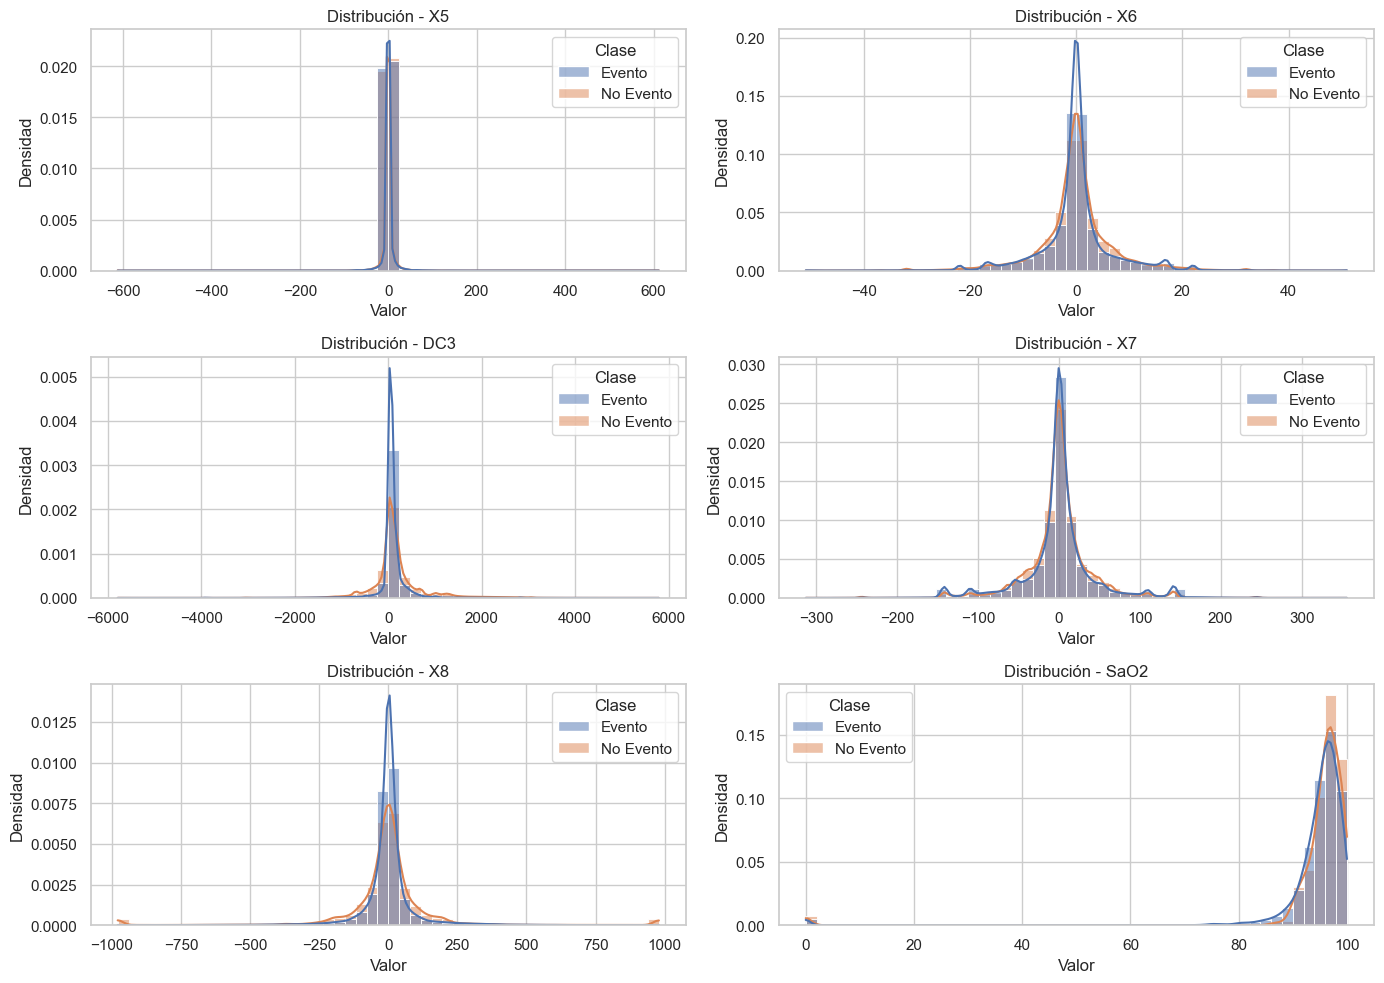

In [55]:
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

for i, canal in enumerate(canales):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df_total[df_total['Canal'] == canal],
                 x='Valor', hue='Clase', kde=True, bins=50,
                 stat="density", common_norm=False)
    plt.title(f'Distribución - {canal}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


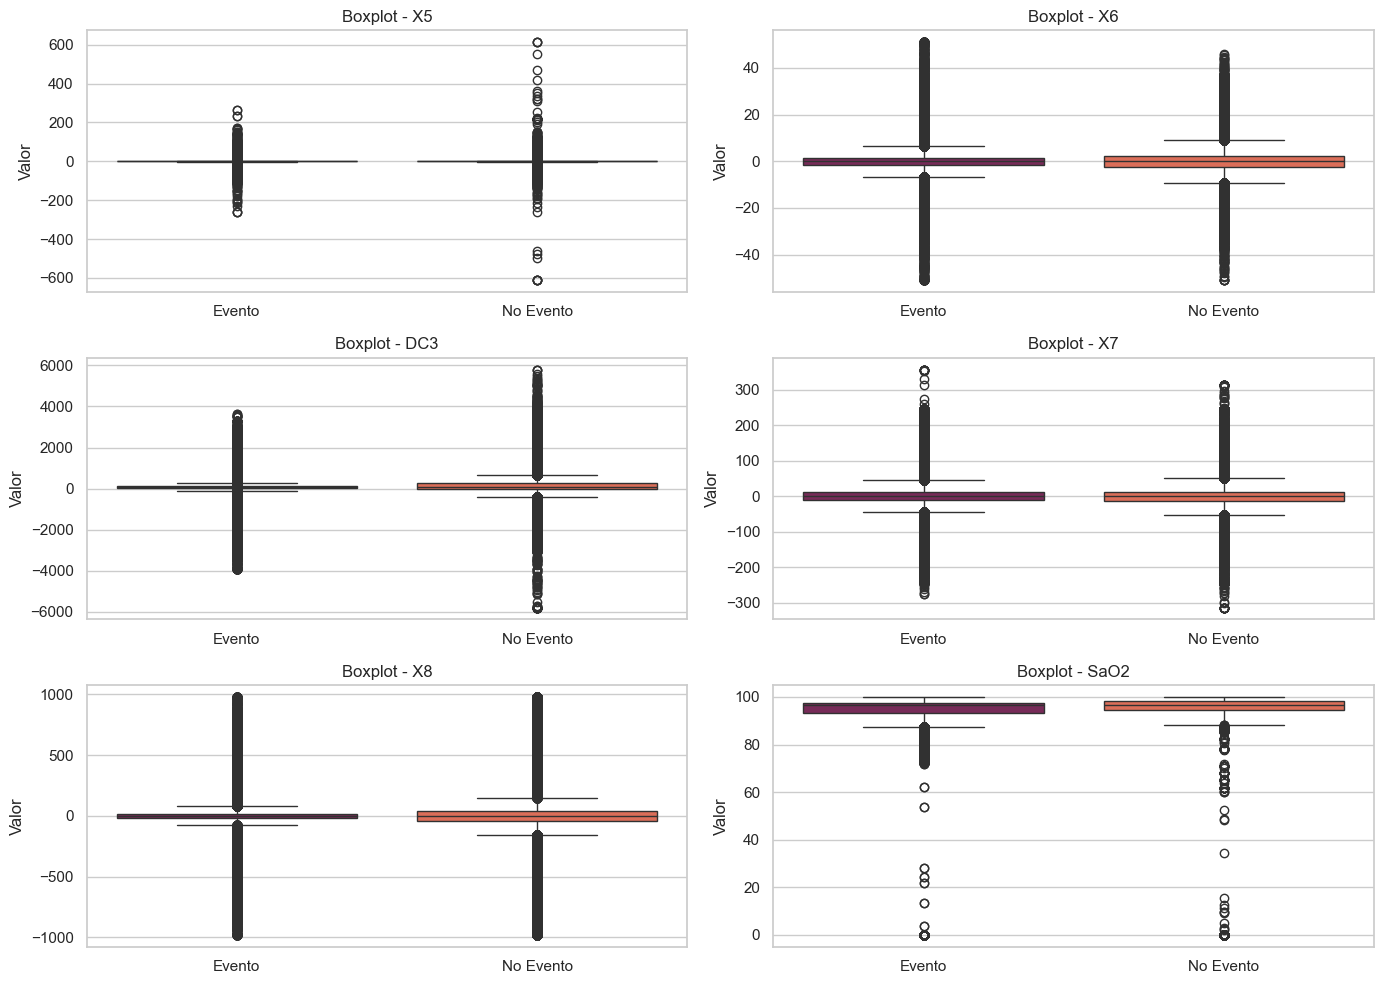

In [64]:
# Estilo
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Crear un subplot para cada canal
for i, canal in enumerate(canales):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df_total[df_total['Canal'] == canal],
                x='Clase', y='Valor',palette='rocket', hue='Clase')
    plt.title(f'Boxplot - {canal}')
    plt.xlabel('')
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()



In [57]:
resumen_estadistico = df_total.groupby(['Clase', 'Canal'])['Valor'].describe().round(3)
print("\n📈 Estadísticas por canal y clase:\n")
print(resumen_estadistico)

# Guardar si deseas
# resumen_estadistico.to_csv("estadisticas_por_canal.csv")



📈 Estadísticas por canal y clase:

                    count     mean      std       min     25%     50%  \
Clase     Canal                                                         
Evento    DC3    170250.0   77.500  319.542 -3922.313  15.270  66.834   
          SaO2   170250.0   94.501    9.779     0.000  93.390  96.439   
          X5     170250.0    0.006    6.578  -262.000  -0.564   0.009   
          X6     170250.0   -0.066    6.880   -51.000  -1.801  -0.043   
          X7     170250.0    0.201   46.450  -276.103 -10.601   0.339   
          X8     170250.0   -0.074  110.418  -979.000 -19.497   0.723   
No Evento DC3    171000.0  169.091  581.186 -5791.000  -7.214  81.999   
          SaO2   171000.0   94.778   12.089     0.000  94.409  96.439   
          X5     171000.0    0.017    8.573  -612.000  -0.484   0.009   
          X6     171000.0   -0.022    7.076   -51.000  -2.369  -0.037   
          X7     171000.0    0.070   41.247  -313.000 -12.594   0.208   
          X8   

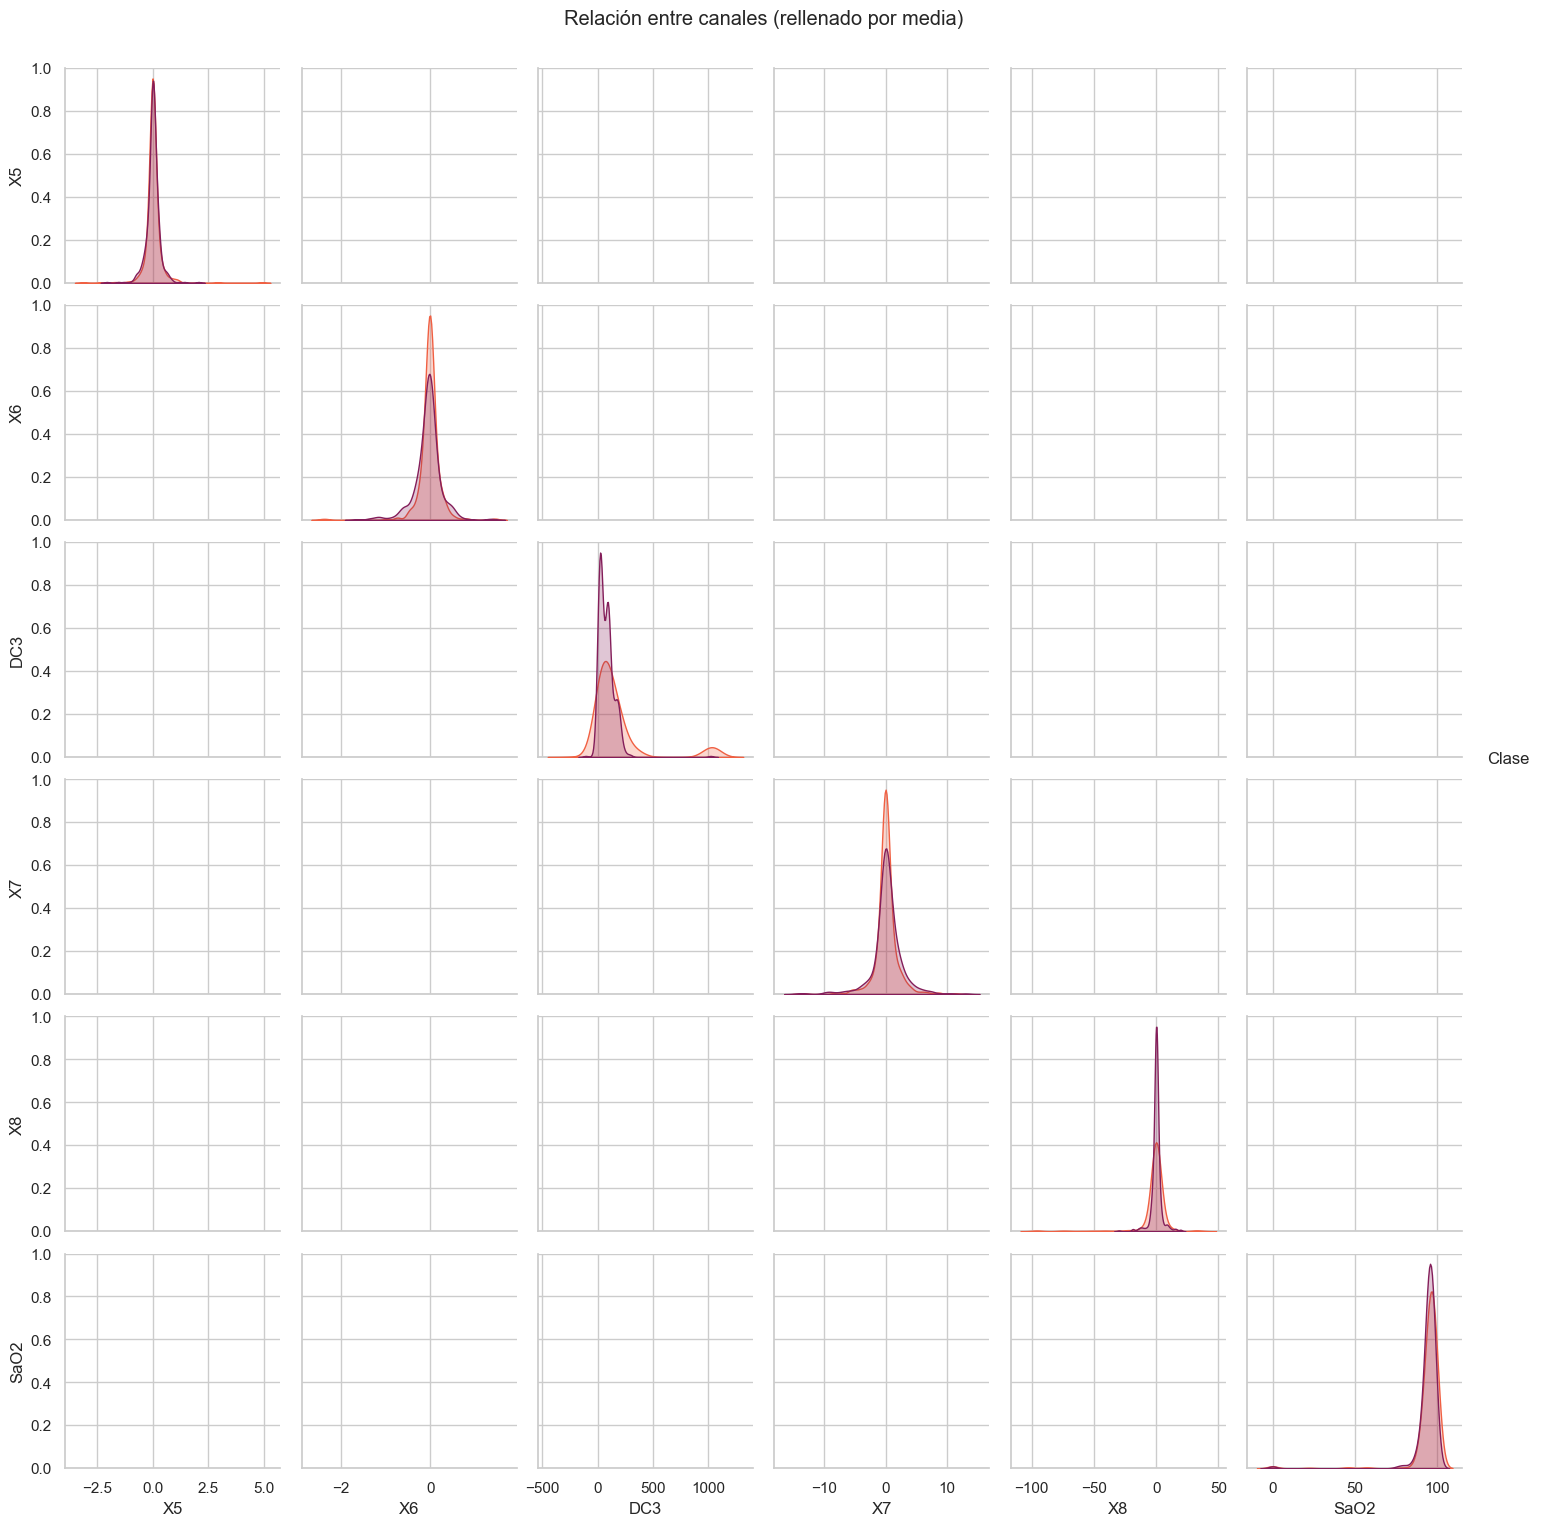

In [82]:
def leer_csvs_en_df(ruta_carpeta, clase_nombre):
    datos = []
    for archivo in glob.glob(os.path.join(ruta_carpeta, '*.csv')):
        try:
            df = pd.read_csv(archivo)
            if df.shape != (375, 6):
                print(f"⚠️ Archivo ignorado por forma inesperada: {archivo}")
                continue

            df_valores = df.iloc[:, :]  # Ignorar columna de tiempo
            canales_archivo = df_valores.columns.tolist()

            for canal in canales:
                if canal in canales_archivo:
                    valores = df_valores[canal]
                else:
                    # Si falta, se agregan 375 NaNs
                    valores = [np.nan] * 375

                for valor in valores:
                    datos.append({
                        'Canal': canal,
                        'Valor': valor,
                        'Clase': clase_nombre
                    })

        except Exception as e:
            print(f"❌ Error procesando {archivo}: {e}")
    return datos

# pivot_table como ya lo haces
df_ancho = df_total.pivot_table(index=df_total.index // 375, columns='Canal', values='Valor')
df_ancho['Clase'] = df_total.groupby(df_total.index // 375)['Clase'].first().values

# rellenar los NaNs
# df_ancho_fill = df_ancho.copy()
# df_ancho_fill[canales] = df_ancho_fill[canales].fillna(df_ancho_fill[canales].mean())

# Graficar con los datos rellenados
sns.pairplot(df_ancho, vars=canales, hue='Clase', palette='rocket')
plt.suptitle("Relación entre canales (rellenado por media)", y=1.02)
plt.show()

# #---------------------------------------------Dejando los que no tienen NaN
# df_ancho_clean = df_ancho.dropna()

# # Ahora sí puedes graficar correctamente
# sns.pairplot(df_ancho_clean, vars=canales, hue='Clase', palette='Set2')
# plt.suptitle("Relación entre canales (sujetos sin NaN)", y=1.02)
# plt.show()


# sns.pairplot(df_ancho, vars=canales, hue='Clase', palette='rocket')
# plt.suptitle('Relaciones entre Canales por Clase', y=1.02)
# plt.show()
